# WORD2VEC

Session 3 - Exercice 2

# Load Packages

__Load the necessary packages before starting your work__

In [2]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import gensim
from gensim.test.utils import get_tmpfile
print(gensim.__version__)

4.3.0


In [4]:
# Classic data manipulation libraries
import re
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unidecode

# Visualization libraries
import seaborn as sns

# NLP Libraries
import gensim
from gensim.test.utils import get_tmpfile
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Define parameters for notebook import
%matplotlib inline
pd.set_option('display.max_columns', 500)

# Load Data

__1- Get the data and look at its shape__

In [7]:
# This is the preprocessed data from the previous homework for this homework we shall be using the dataset provided by capgemini
df_group = pd.read_csv("Final data")
df_group.shape

(400, 12)

In [6]:
df_group.head()

text  grade              date  \
0  Catastrophe énergétique\r\nPremière souscripti...      1   03 février 2023   
1  Augmentation du prix de kWh X3\r\nAugmentation...      1   24 janvier 2023   
2  BRAQUEURS ENI\r\nSimplement : échéancier 2022 ...      1   26 janvier 2023   
3  Facture démentielle.\r\nFacture démentielle.\r...      1   31 janvier 2023   
4  A fuir !\r\nAyant un relevé tous les deux mois...      1   08 janvier 2023   

  company  n_words                                         clean_text  \
0     eni      131  catastrophe energetique premiere souscription ...   
1     eni       57  augmentation du prix de kwh x augmentation du ...   
2     eni       63  braqueurs eni simplement echeancier mois pour ...   
3     eni      133  facture dementielle facture dementielle les pr...   
4     eni       48  a fuir ayant un releve tous les deux mois pour...   

                                      tokenized_text  \
0  ['catastrophe', 'energetique', 'premiere', 'so...   
1  ['augmentation', 'prix', 'kwh', 'x', 'augmenta...   
2  ['braqueurs', 'eni', 'simplement', 'echeancier...   
3  ['facture', 'dementielle', 'facture', 'dementi...   
4  ['fuir', 'releve', 'tous', 'deux', 'mois', 'co...   

                                             bigrams  \
0  [('catastrophe', 'energetique'), ('energetique...   
1  [('augmentation', 'prix'), ('prix', 'kwh'), ('...   
2  [('braqueurs', 'eni'), ('eni', 'simplement'), ...   
3  [('facture', 'dementielle'), ('dementielle', '...   
4  [('fuir', 'releve'), ('releve', 'tous'), ('tou...   

                                            trigrams  \
0  [('catastrophe', 'energetique', 'premiere'), (...   
1  [('augmentation', 'prix', 'kwh'), ('prix', 'kw...   
2  [('braqueurs', 'eni', 'simplement'), ('eni', '...   
3  [('facture', 'dementielle', 'facture'), ('deme...   
4  [('fuir', 'releve', 'tous'), ('releve', 'tous'...   

                                            wordDict  \
0  {'magasin': 0, 'servira': 0, 'fausse': 0, 'dep...   
1  {'magasin': 0, 'servira': 0, 'fausse': 0, 'dep...   
2  {'magasin': 0, 'servira': 0, 'fausse': 0, 'dep...   
3  {'magasin': 0, 'servira': 0, 'fausse': 0, 'dep...   
4  {'magasin': 0, 'servira': 0, 'fausse': 0, 'dep...   

                                               tfBOW  \
0  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...   
1  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...   
2  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...   
3  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...   
4  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...   

                                               tfIDF  
0  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...  
1  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...  
2  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...  
3  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...  
4  {'magasin': 0.0, 'servira': 0.0, 'fausse': 0.0...

__2- Look into few lines of your data and see variables types__

In [8]:
# your code here
df_group.dtypes

text              object
grade              int64
date              object
company           object
n_words            int64
clean_text        object
tokenized_text    object
bigrams           object
trigrams          object
wordDict          object
tfBOW             object
tfIDF             object
dtype: object

__3- If there is something not normal to you, correct it; otherwise going on to the next section__

In [9]:
#The data is already preprocessed

__4- Get the reviews of the Capgemini dataset to begin with__

_(later you could try with you own dataset or with the full students data)_


In [11]:
# This is the dataset provided by capgemini
df = pd.read_json("fournisseurs_energie_top5_forums.json")
df["text"]

0        Je paie ma facture tous les deux mois en fonct...
1        Engie facture a ses clients des sommes exorbit...
2        Ils me facturent sur le pdl du logement au des...
3        un service client ou il est dur de comprendre ...
4        Excellente expérience avec ENGIE et une interl...
                               ...                        
37289      Le commercial est très bien Le SAV est à revoir
37290      tres professionnel et maintrisant bien le sujet
37291    Je le décrirai d'une façon totalement profesio...
37292    Un rendez-vous qui s'est très bien déroulé, un...
37293    Aucun problème, la conseillère est très profes...
Name: text, Length: 37266, dtype: object

__5- Try to see if there's not something else to do__

__6- Create your corpus (it is a list of tokenized the reviews)__

In [12]:
# code here
corpus = df['text'].tolist()
corpus = [comment.lower() for comment in corpus]
corpus[:3]

["je paie ma facture tous les deux mois en fonction de ma consommation exacte d'électricité. cette facture tombe généralement en fin de mois, pile avant ma paie et j'ai donc constamment un peu moins d'une semaine de retard sur le paiement, mais mis a part un sms de rappel je n'ai jamais été harcelé par leurs services et ai même pu bénéficier une paire de fois d'un étalement des paiements quand j'en ai eu besoin. leur service client est d'ailleurs généralement très agréable et compréhensif.",
 'engie facture a ses clients des sommes exorbitants !\n\nengie mon facturer un technicien pour le gaz , alors que grdf m’a bien préciser que le gaz était déjà en service dans mon logement ! résultat des courses une facture de 71 euros juste pour ouvrir le compteur électrique de mon nouveau logement , concernant le gaz personne est intervenu sur ma chaudière j’ai dû le faire tout seul !\n\nengie savent prendre l’argent à tord mais quand ont leur explique malheureusement plus personne est là !',
 "i

In [13]:
def clean_sentence(sentence, stopwords=False):
    sentence = sentence.lower().strip()
    sentence = unidecode.unidecode(sentence) #remove accents from letters
    sentence = re.sub(r'[^a-z0-9\s]', ' ', sentence) #remove non-alphanumeric characters
    #sentence = re.sub(r"\d+", "", sentence) #remove numbers
    sentence = re.sub(r"\s+"," ",sentence) #remove whitespace
    
    return sentence

df["clean_text"] = df.text.apply(clean_sentence)
df

fournisseur  page         source       date  \
0           engie     1     trustpilot 2022-12-01   
1           engie     1     trustpilot 2022-11-26   
2           engie     1     trustpilot 2022-11-29   
3           engie     1     trustpilot 2022-11-29   
4           engie     1     trustpilot 2022-12-01   
...           ...   ...            ...        ...   
37289      edfenr   508  avis_verifies 2022-01-31   
37290      edfenr   508  avis_verifies 2022-01-27   
37291      edfenr   508  avis_verifies 2022-01-25   
37292      edfenr   508  avis_verifies 2022-01-27   
37293      edfenr   508  avis_verifies 2022-01-27   

                                                    text  \
0      Je paie ma facture tous les deux mois en fonct...   
1      Engie facture a ses clients des sommes exorbit...   
2      Ils me facturent sur le pdl du logement au des...   
3      un service client ou il est dur de comprendre ...   
4      Excellente expérience avec ENGIE et une interl...   
...                                                  ...   
37289    Le commercial est très bien Le SAV est à revoir   
37290    tres professionnel et maintrisant bien le sujet   
37291  Je le décrirai d'une façon totalement profesio...   
37292  Un rendez-vous qui s'est très bien déroulé, un...   
37293  Aucun problème, la conseillère est très profes...   

                                              clean_text  
0      je paie ma facture tous les deux mois en fonct...  
1      engie facture a ses clients des sommes exorbit...  
2      ils me facturent sur le pdl du logement au des...  
3      un service client ou il est dur de comprendre ...  
4      excellente experience avec engie et une interl...  
...                                                  ...  
37289    le commercial est tres bien le sav est a revoir  
37290    tres professionnel et maintrisant bien le sujet  
37291  je le decrirai d une facon totalement profesio...  
37292  un rendez vous qui s est tres bien deroule un ...  
37293  aucun probleme la conseillere est tres profess...  

[37266 rows x 6 columns]

In [14]:
tokenized_corpus = [re.split('\s+', comment) for comment in df.clean_text]
#print(len(tokenized_corpus))
print(tokenized_corpus[0])
df["tokenized_text"] = tokenized_corpus

['je', 'paie', 'ma', 'facture', 'tous', 'les', 'deux', 'mois', 'en', 'fonction', 'de', 'ma', 'consommation', 'exacte', 'd', 'electricite', 'cette', 'facture', 'tombe', 'generalement', 'en', 'fin', 'de', 'mois', 'pile', 'avant', 'ma', 'paie', 'et', 'j', 'ai', 'donc', 'constamment', 'un', 'peu', 'moins', 'd', 'une', 'semaine', 'de', 'retard', 'sur', 'le', 'paiement', 'mais', 'mis', 'a', 'part', 'un', 'sms', 'de', 'rappel', 'je', 'n', 'ai', 'jamais', 'ete', 'harcele', 'par', 'leurs', 'services', 'et', 'ai', 'meme', 'pu', 'beneficier', 'une', 'paire', 'de', 'fois', 'd', 'un', 'etalement', 'des', 'paiements', 'quand', 'j', 'en', 'ai', 'eu', 'besoin', 'leur', 'service', 'client', 'est', 'd', 'ailleurs', 'generalement', 'tres', 'agreable', 'et', 'comprehensif', '']


# Building your own Word2Vec

__1- Load gensim package__

In [15]:
# code here (if you forgot to load the package at the beginning)
from gensim.models import Word2Vec

__2- Create a temporary file by giving an extension and make sure you add ".model" as extension__

In [16]:
# code here
import tempfile

# Create a temporary file with the ".model" extension
path = get_tmpfile("word2vec_homework.model")

__3- Instantiate your word2vec model__


In [17]:
# instantiate the model
model = Word2Vec(tokenized_corpus, window=5, min_count=1, workers=4)


__4- Define the vocabulary of your model__

In [18]:
# code here
model.build_vocab(tokenized_corpus[:3000])

__5- Train your word2vec model__

In [19]:
# code here
model.train(tokenized_corpus[:3000], total_examples=model.corpus_count, epochs=50)

(5791032, 7998900)

__6- Save your word2vec model; give the same path as in your temporary file__

In [20]:
# code here
model.save("word2vec_homework.model")

__Congratulations, you've built your first word2vec model !!!__

__7- Try to repeat the previous steps and change the values of hyperparameters from the model instatiation step__

In [21]:
# code here
model = Word2Vec(tokenized_corpus, window=3, min_count=1, workers=5)
model.build_vocab(tokenized_corpus[:3000])
model.train(tokenized_corpus[:3000], total_examples=model.corpus_count, epochs=50)
model.save("word2vec_homework1.model")


__8- Load the model you've saved (from the same path as saving path)__

In [22]:
# code here
model = gensim.models.Word2Vec.load("word2vec_homework.model")


__9- Get the weight vector of a word; this is the vector (of numerical) representation of your word__

In [23]:
# code here
word = "quand"
word_vector = list(model.wv[word])
word_vector


[6.87215,
 -2.3101897,
 -0.39631957,
 1.1944106,
 3.6311069,
 -0.55378693,
 2.2141607,
 1.2517196,
 1.0532466,
 -1.7204787,
 -1.2247556,
 -2.3266819,
 -0.96124685,
 0.8781025,
 2.3501787,
 3.0227895,
 -1.947975,
 0.11005926,
 -0.67201227,
 1.6876652,
 3.1340322,
 -0.44850576,
 -3.273055,
 0.61439955,
 -1.9189663,
 -0.058014113,
 -2.092351,
 1.0420145,
 -3.1389453,
 0.7034245,
 0.5070588,
 -0.9026107,
 -2.4799094,
 0.56376755,
 3.7156286,
 1.4236721,
 -1.2611657,
 1.209713,
 -0.6422413,
 1.8576361,
 -4.125143,
 1.3473701,
 -2.903767,
 -0.6127748,
 2.7428734,
 3.6321154,
 -0.79638106,
 -1.3917868,
 0.056286007,
 -2.0745976,
 -0.43615174,
 -1.1889374,
 -1.4122488,
 -1.2556633,
 0.41109946,
 -3.1462326,
 4.200805,
 -0.38941652,
 -0.4956148,
 0.24064776,
 -1.5758685,
 -1.7244004,
 -2.029967,
 -0.9133443,
 -2.2811778,
 -4.6604457,
 -0.1726991,
 -1.9869663,
 -1.6986555,
 -4.1433167,
 -0.75928295,
 4.5748453,
 -3.0123715,
 -1.3893138,
 6.190738,
 -2.5803342,
 2.7693315,
 1.912974,
 -1.3590308,

__10- Get the similarity of some words from your laoded model__

In [24]:
# code here
model.wv.most_similar("quand", topn=6)

[('general', 0.49375152587890625),
 ('lorsque', 0.4920729100704193),
 ('epoque', 0.32880711555480957),
 ('debranche', 0.32138606905937195),
 ('derniers', 0.31680914759635925),
 ('embrouillant', 0.30860063433647156)]

# Create Word Embedding of Words

__1- Get the embedding matrix of your corpus__

In [25]:
# code here
embedding_matrix = dict()
# START CODE HERE
# embedding_matrix[word]= word2vec representation of the word
for word in model.wv.index_to_key:
    embedding_matrix[word] = list(model.wv[word])

embedding_matrix

{'de': [0.8079091,
  0.20935409,
  0.64270884,
  -1.0458006,
  -1.0747732,
  -0.2811617,
  0.38192394,
  -0.4193811,
  1.150492,
  -0.25741392,
  1.5315094,
  0.33653638,
  0.9821815,
  -1.0376418,
  -0.8056524,
  0.1364587,
  1.2863797,
  -0.22273643,
  0.11611939,
  0.98240966,
  1.44447,
  0.49065915,
  0.58187383,
  -1.6913562,
  -0.67469835,
  0.9090724,
  0.16883132,
  -0.76805604,
  -0.038209945,
  1.0891153,
  0.35594255,
  -0.5632102,
  1.8617877,
  0.8360382,
  1.0542293,
  0.87812185,
  -0.07102294,
  0.3137979,
  -0.13268726,
  0.95658624,
  -0.4697544,
  -2.5565462,
  -0.17749321,
  0.4155589,
  1.2407118,
  1.3794333,
  -1.0392771,
  1.7709292,
  1.2260398,
  0.39911443,
  -0.21385486,
  0.4288629,
  -0.7128081,
  -0.27714622,
  -0.09919134,
  -0.10646314,
  -1.1001244,
  -0.33835697,
  1.3412608,
  0.23612317,
  -0.33246514,
  1.8785876,
  -0.7456196,
  -0.6161736,
  0.9187681,
  -1.219757,
  -0.2802577,
  -1.4217469,
  0.1487347,
  0.8928281,
  0.11076101,
  0.77112883,

__2- Transform it to a pandas DataFrame and look into few lines of you embedding matrix__

In [26]:
# code here
embedding_matrix = pd.DataFrame(embedding_matrix)
embedding_matrix.head()
embedding_matrix.shape

(100, 8892)

# Discovering Knowledge With Embedding Matrix

## 1- Dimension Reduction (PCA)

__1.1- Instantiate a PCA with whatever number of components that you want__

In [38]:
# code here
pca = PCA(n_components=2)

__1.2- Fit your PCA to your data; make sure your words are the rows of your data__

In [39]:
# code here
word_vector = model.wv
# 2D numpy arrays
word_vector_matrix = word_vector.vectors
# code here
pca.fit(word_vector_matrix)

PCA(n_components=2)

__1.3- Get the explained variance ratio of your PCA__

In [40]:
# code here
print(pca.explained_variance_ratio_)

[0.03878381 0.029542  ]


__1.4- Apply your PCA to your data__

In [41]:
# code here
pca_data = pca.transform(word_vector_matrix)

__1.5- Get a look (a plot) of the PCA on your data__

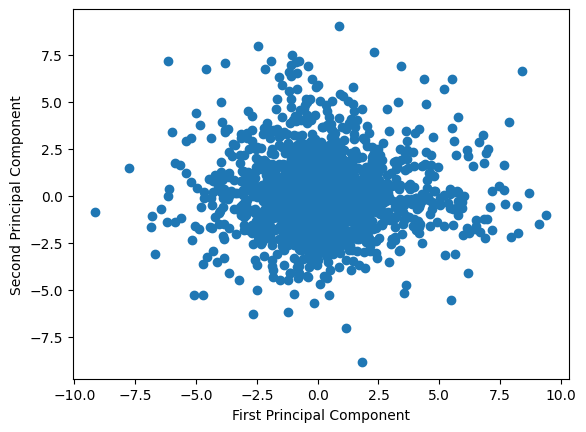

In [45]:
# code here
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

## 2- Dimension reduction (T-SNE)

__2.1- Instantiate your TSNE method__

In [32]:
# code here
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)

__2.2- Fit your data and transform it__

In [33]:
# code here
tsne_model = tsne.fit_transform(word_vector_matrix)

__2.3- Get a look on your TSNE transformation__

In [34]:
# code here
tsne_model

array([[ 48.29671  ,  27.86976  ],
       [ 44.708427 , -71.264885 ],
       [-57.116253 ,  37.172447 ],
       ...,
       [ 14.161782 ,  -9.684543 ],
       [-86.90559  ,  -6.8174243],
       [ 37.472866 , -21.815962 ]], dtype=float32)

# Generating your Reviews Embedding Matrix

__1- For each reviews, aggregate (average) the weight vector of terms it comprises__

In [35]:
import numpy as np

def aggregate_review_vectors(reviews, word2vec_model):
    review_vectors = []
    for review in reviews:
        review_words = review.split()
        review_vector = np.zeros(word2vec_model.vector_size)
        count = 0
        for word in review_words:
            if word in word2vec_model.wv:
                word_vector = word2vec_model.wv[word]
                review_vector += word_vector
                count += 1
        if count > 0:
            review_vector /= count
        review_vectors.append(review_vector)
    return review_vectors

#reviews = [review1, review2, ...] # list of reviews as strings
review_vectors = aggregate_review_vectors(df["text"], model)
review_vectors

[array([ 0.76727322,  0.15723599,  0.23522976, -0.10198377, -0.06142702,
        -0.21933109, -0.33116036, -0.17898956,  0.48979332, -0.18663055,
         0.57470955,  0.33927492,  0.55319982,  0.08321447, -0.23408481,
        -0.44526428, -0.10263441,  0.40140105, -0.0289761 ,  0.70386791,
         0.52361285, -0.2444944 ,  0.45370956, -0.87957667, -0.1089437 ,
        -0.05256104,  0.00810863,  0.06022556,  0.41607299,  0.34379499,
         0.58840314,  0.02872631, -0.09631452, -0.00217573,  0.29440803,
         0.32156249, -0.11837508, -0.00189036,  0.55611992,  0.18543566,
        -0.3752217 ,  0.18986532,  0.03714804, -0.31667037,  0.72224064,
         0.97552019,  0.158259  , -0.03242648, -0.16796664,  0.22651322,
        -0.32144168, -0.20142151, -0.68672792, -0.28337313,  0.39404885,
         0.07607918, -0.33686998,  0.0329727 ,  0.81310739,  0.41676724,
         0.20947316,  0.22358294, -0.58619289, -0.1969878 ,  0.44520321,
        -0.01611632, -0.0484013 , -0.08763875, -0.0

__2- There you go, you build your first word2vec embedding matrix for further analysis__

In [36]:
# code here

__The End!__